# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./../data/train.p"
validation_file = "./../data/valid.p"
testing_file = "./../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = format(X_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
# NumPy unique gives us unique elements from the array... We use it to count the number of unique labels...
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Check the different labels

Here, we will print the list of labels from the file signnames.csv. We convert our list of signnames to dictionary type so that we can assign and display signnames to the labels. We will print the dictionary.

In [3]:
import csv
import pprint as pp

print("The different classes/labels for our traffic sign images are listed below here ...")
print()
signs_dict = {}
dict_list = []

i = 0
with open('signnames.csv', newline='') as csvfile:
    row_reader = csv.reader(csvfile, delimiter=',')
    for row in row_reader:
        dict_list.append(row)
        if (i != 0):
            signs_dict[i-1] = dict_list[i][1]
        i = i + 1
        
pp.pprint(signs_dict)
print()
print("We will use this dictionary for understanding different roadsigns...")

The different classes/labels for our traffic sign images are listed below here ...

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limi

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Here, I randomly display 5 files from our dataset along with their labels. This is only for visualizing our data.

<class 'numpy.ndarray'>


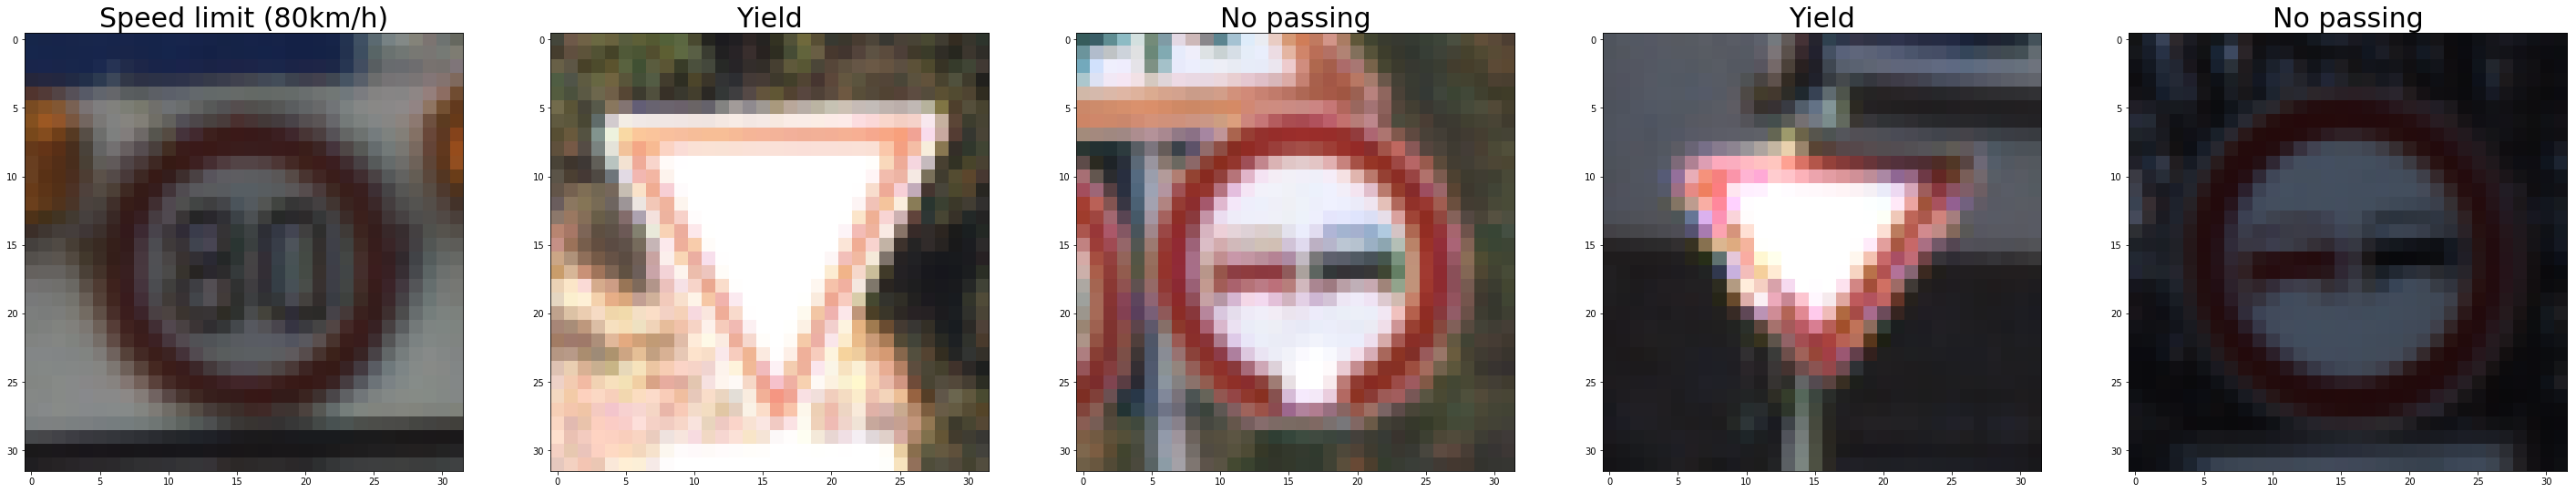

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random

print(type(X_train))

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

# plt.figure(figsize=(1,1))
# plt.imshow(image, cmap="gray")
# print(y_train[index])

f, ax = plt.subplots(1, 5, figsize=(50, 10))
ax = ax.ravel()

for i in range(5):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    ax[i].imshow(image)
    ax[i].set_title(signs_dict[y_train[index]], fontsize=30)
    

## Analyzing our datasets

We will test our datasets to look at the distribution of classes. This will help us in understanding which labels are more common in our datasets and will also help with tweaking our model training parameters to improve accuracy.

Here, we oberve that for some of the classes such as 2, 3 or 38 and few others, we have more than 1500 sample images.

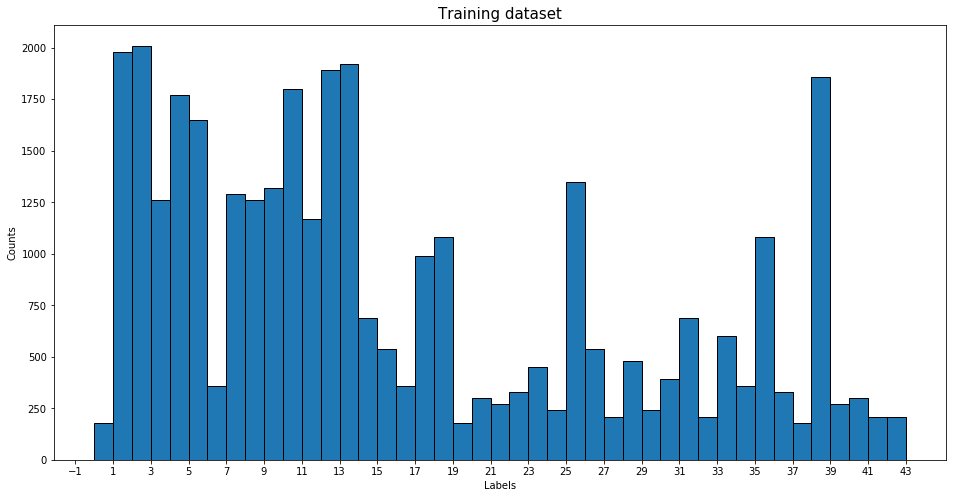

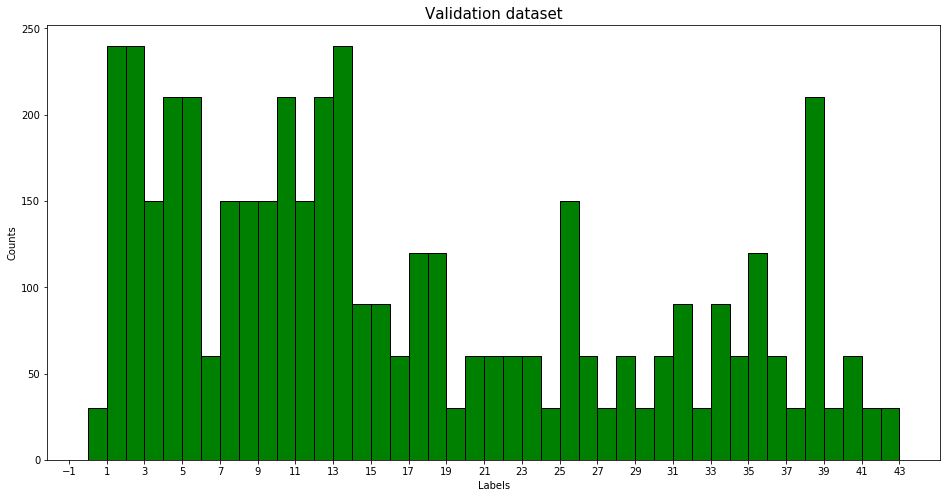

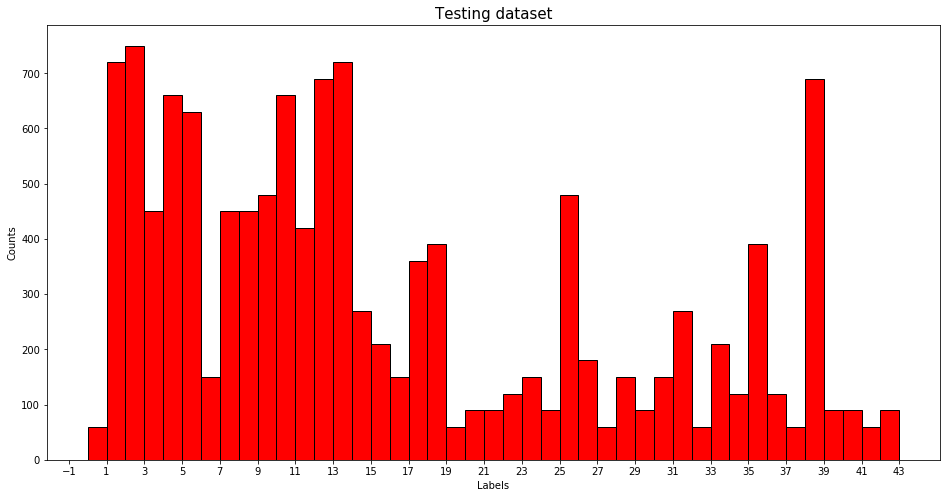

In [5]:
# analysis of datasets for label counts
# for training data

# x_labels = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44]

plt.figure(figsize=(16,8))
plt.hist(y_train, bins=range(n_classes+1), edgecolor = 'black')
plt.xticks(np.arange(-1, 44, step=2))
plt.title("Training dataset", fontsize=15)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.show()

# for validation data
plt.figure(figsize=(16,8))
plt.hist(y_valid, bins=range(n_classes+1), edgecolor = 'black', color='Green')
plt.xticks(np.arange(-1, 44, step=2))
plt.title("Validation dataset", fontsize=15)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.show()

# for testing data
plt.figure(figsize=(16,8))
plt.hist(y_test, bins=range(n_classes+1), edgecolor = 'black', color='red')
plt.xticks(np.arange(-1, 44, step=2))
plt.title("Testing dataset", fontsize=15)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
### Normalizing the pixels of image set

def normalize_image(rgb_img):
    
    gray = np.sum(rgb_img/3, axis=3, keepdims=True)
    norm_img = (gray-128)/128
    
    return norm_img

### Saving normalized images

We will save our normalized images to a new dataset for training and validation.


In [7]:
print(type(X_train))
X_train_norm = normalize_image(X_train)
X_valid_norm = normalize_image(X_valid)
X_test_norm = normalize_image(X_test)

<class 'numpy.ndarray'>


## Shuffle Data

Here we will first shuffle the training data we have.

In [8]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train_norm, y_train)
X_valid, y_valid = shuffle(X_valid_norm, y_valid)
X_test, y_test = shuffle(X_test_norm, y_test)

### Model Architecture

We start building our model architecture from here. We will load our data, define a function containing all our CNN layers and execute this function on our data to get the accuracy results.

### Setup TensorFlow

The EPOCH and BATCH_SIZE values affect the training speed and model accuracy.

In [9]:
### Define your architecture here.

import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 128

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

# takes x image as input
def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)                  
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides = [1,2,2,1], padding='VALID')
    
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides = [1,2,2,1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(400,120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Using dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    
    # TODO: Layer 4: Fully Connected. Input = 240. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Using dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    
    
    return logits

### Features and Labels

Train LeNet to classify our data. We are also including dropout definition here. Dropout is an overfit avoiding techqniuq by randomly deactivating some nodes in the hidden layer. The dropout has ensemble effect since every minibatch will different activated nodes.

*keep_prob* is the tensorflow placeholder for dropout ratio.

In [11]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# dropout variable
keep_prob = tf.placeholder(tf.float32)

### Training Pipeline

Here, we create a pipeline that uses te model to classify our traffic images.

In [12]:
rate = 0.00095 # reduced from 0.001 to 0.00095

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

We evaluate the loss and accuracy of the model for the given dataset.


In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

Training...

EPOCH 1 ...
Validation Accuracy = 0.584

EPOCH 2 ...
Validation Accuracy = 0.804

EPOCH 3 ...
Validation Accuracy = 0.870

EPOCH 4 ...
Validation Accuracy = 0.881

EPOCH 5 ...
Validation Accuracy = 0.896

EPOCH 6 ...
Validation Accuracy = 0.921

EPOCH 7 ...
Validation Accuracy = 0.921

EPOCH 8 ...
Validation Accuracy = 0.932

EPOCH 9 ...
Validation Accuracy = 0.937

EPOCH 10 ...
Validation Accuracy = 0.944

EPOCH 11 ...
Validation Accuracy = 0.938

EPOCH 12 ...
Validation Accuracy = 0.936

EPOCH 13 ...
Validation Accuracy = 0.941

EPOCH 14 ...
Validation Accuracy = 0.944

EPOCH 15 ...
Validation Accuracy = 0.953

EPOCH 16 ...
Validation Accuracy = 0.942

EPOCH 17 ...
Validation Accuracy = 0.952

EPOCH 18 ...
Validation Accuracy = 0.949

EPOCH 19 ...
Validation Accuracy = 0.951

EPOCH 20 ...
Validation Accuracy = 0.953

EPOCH 21 ...
Validation Accuracy = 0.956

EPOCH 22 ...
Validation Accuracy = 0.961

EPOCH 23 ...
Validation Accuracy = 0.953

EPOCH 24 ...
Validation Accura

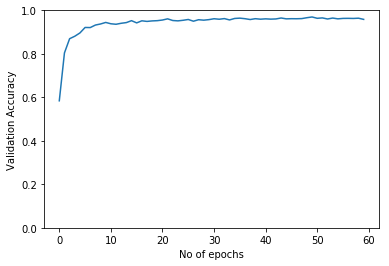

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    epoch_list = []
    accuracy_list = []
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        epoch_list.append(i)
        accuracy_list.append(validation_accuracy)
        
    saver.save(sess, './lenet')
    print("Model saved")
    
    print("Plotting epochs vs validation accuracy ...")
    plt.plot(epoch_list, accuracy_list)
    plt.ylim(0, 1) 
    plt.xlabel('No of epochs')
    plt.ylabel('Validation Accuracy')
    

### Check accuracy on test data

Here, we check the accuracy of test dataset. It is important to not se this data to configure your model. So, DO NOT run this cell when you are training your model. Run this model only when you think that accuracy achieved within the validation model is significant.

In [15]:
# testing model accuracy on testing dataset
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.942


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name. I ran google searches for German road signs and tried differnet versions of the images. I have included 6 images here. I have also names the images with numbers corresponding to the labels in `signnames.csv`.

### Load and Output the Images

['./test_images/04.jpg', './test_images/12.jpg', './test_images/14.jpg', './test_images/15.jpg', './test_images/25.jpg', './test_images/38.jpg']



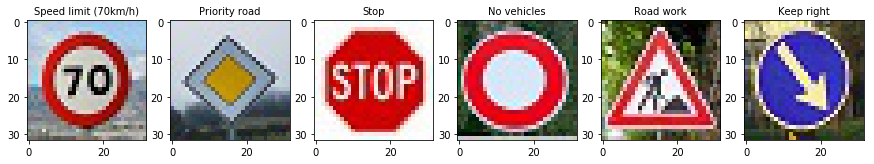

In [16]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# I have already resized the images to 32x32 size using an external image editor

import cv2
import glob

# print list of new images
my_images = sorted(glob.glob('./test_images/*.jpg'))
print(my_images)
print()

# assign labels to these images manually
new_labels = np.array([4, 12, 14, 15, 25, 38])

X_new = []
y_new_labels = new_labels

fig, ax = plt.subplots(1,6, figsize=(15, 6))

i = 0
for image in my_images:
    
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img)
    ax[i].set_title(signs_dict[y_new_labels[i]], fontsize=10)
    i = i + 1
    
    # add images to list
    X_new.append(img)


### Normalize the new images

We run our image normalization function on new images.

In [17]:
# we run the normalize function on the new images
# print(type(X_new))

X_new_norm = normalize_image(np.array(X_new))
# print(type(X_new_norm))


### Predict the Sign Type for Each Image

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

softmax_val = tf.nn.softmax(logits)

# highest probability output
top_k = tf.nn.top_k(softmax_val, k=1)

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_new_norm, y_new_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    # To get predicted label
    sess.run(softmax_val,feed_dict = {x: X_new_norm, keep_prob: 1.0})
    top_k = sess.run(top_k, feed_dict={x: X_new_norm, keep_prob: 1.0})
    
    
predictions = top_k[1][:,0]
print("Predictions: ", predictions)

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 1.000
Predictions:  [ 4 12 14 15 25 38]


### Analyze Performance

Here, I am plotting the images along with their predicted and actual labels.

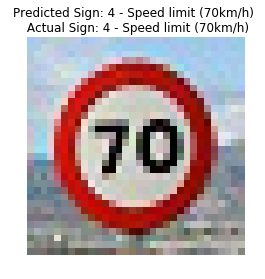

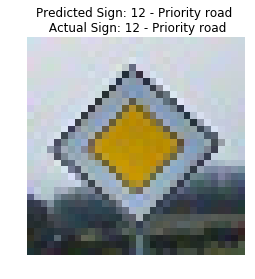

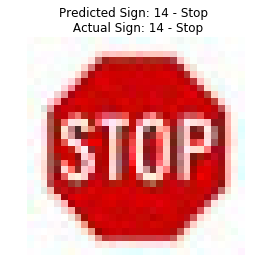

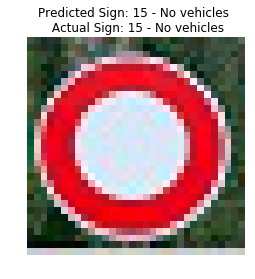

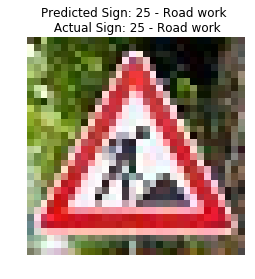

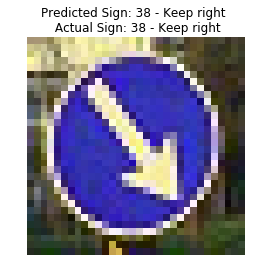

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

for i in range(len(np.array(X_new))):
    plt.figure(i)
    plt.imshow(X_new[i])
    plt.axis('off')
    plt.title(f'Predicted Sign: {predictions[i]} - {signs_dict[predictions[i]]} \n Actual Sign: {y_new_labels[i]} - {signs_dict[y_new_labels[i]]}')
    # print('Actual Label: {{y_new_labels[i]} -- {signs_dict[y_new_labels[i]]}')

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

# top five probabilities output
top_k = tf.nn.top_k(softmax_val, k=5)

with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    # To get predicted label
    sess.run(softmax_val,feed_dict = {x: X_new_norm, keep_prob: 1.0})
    top5_k = sess.run(top_k, feed_dict={x: X_new_norm, keep_prob: 1.0})
    
    
# print(top5_k[1])
# print(type(top5_k))
# print()
print(top5_k[0])
# print("printing next one ...")
# print(top5_k[0][1])
# print(top5_k[0][1][2])

INFO:tensorflow:Restoring parameters from ./lenet
[[  9.99812424e-01   7.68323080e-05   6.07394941e-05   4.34781650e-05
    3.85595558e-06]
 [  1.00000000e+00   2.24742524e-35   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   4.59660470e-08   6.92953377e-12   9.80032841e-14
    4.49681287e-14]
 [  1.00000000e+00   3.55264440e-08   1.82740578e-08   2.18913709e-09
    1.48491042e-09]
 [  1.00000000e+00   8.88914815e-27   8.61266781e-27   5.42882818e-29
    4.39522551e-29]
 [  1.00000000e+00   3.30131064e-32   1.68036784e-37   0.00000000e+00
    0.00000000e+00]]


### Top five probabilities for the test images

Here we will plot the images along with their top five probablities/prediction labels.


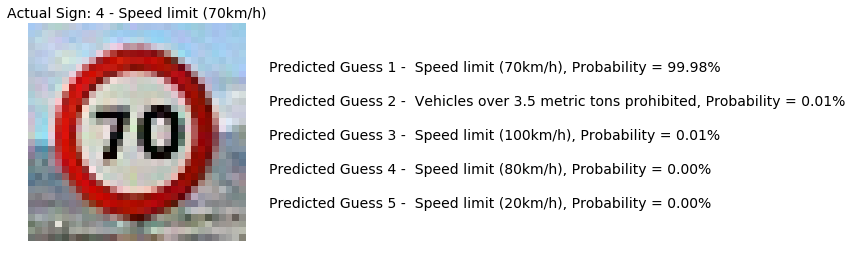

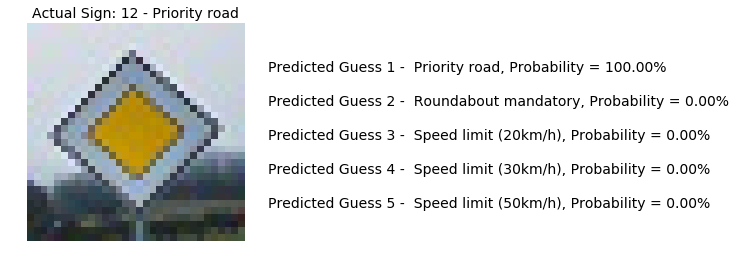

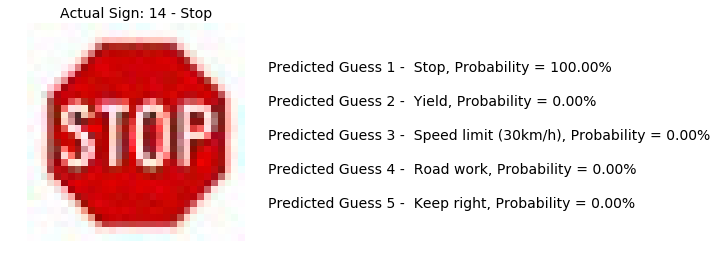

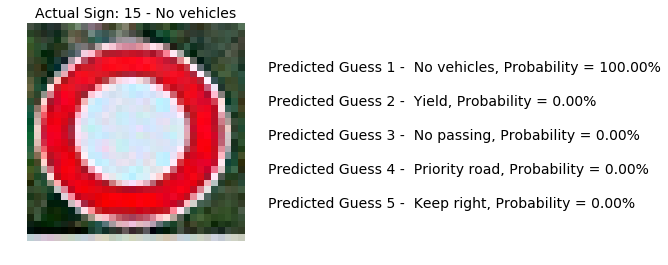

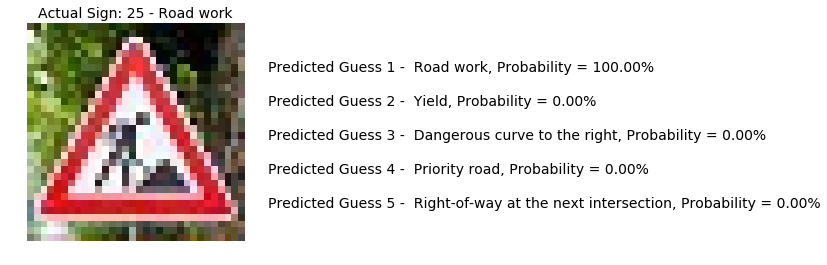

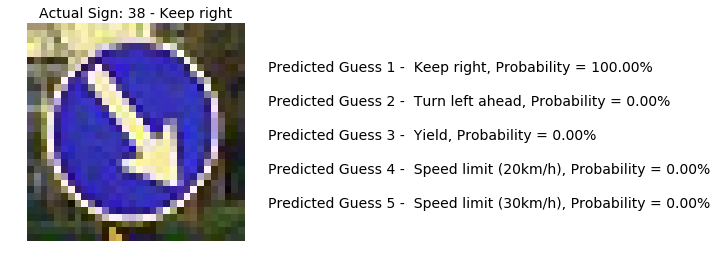

In [21]:
import numpy as np

top5 = top5_k[1]
# top5 = np.array([[1,4,18,0,33], [12,40,13,0,1], [14,33,25,34,13], [15,12,2,9,3], [25,20,18,35,36], [38,34,32,13,0]])

for i in range(len(np.array(X_new))):
    plt.figure(i)
    plt.imshow(X_new[i])
    plt.axis('off')
    plt.title(f'Actual Sign: {new_labels[i]} - {signs_dict[new_labels[i]]}', fontsize = 14)
    # print(f'Predicted Sign: {predictions[i]} - {signs_dict[predictions[i]]}')
    
    y_pixel_val = 6
    add = 5
    for j in range(5):
        # txt="I need the caption to be present a little below X-axis"
        # print(f'Predicted Sign: {top5[i][j]} - {signs_dict[top5[i][j]]} \n')
        
        txt1 = f'Predicted Guess {j+1} - ' + f' {signs_dict[top5[i][j]]}'
        
        prob_value = top5_k[0][i][j]*100
        prob_value = "{:.2f}".format(prob_value)
        
        txt2 = ', Probability = ' + prob_value + '%'
        
        plt.text(35, y_pixel_val, txt1+txt2, horizontalalignment='left', verticalalignment='center', fontsize=14)
        y_pixel_val = y_pixel_val + add

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [22]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")